## Project Name : Air Pressure Failure of Scania Trucks

## 1. Problem Definition 

The goal of the task, as presented by the Industrial Challenge for IDA 2016, waste minimize maintenance costs of the air pressure system (APS) of Scania trucks.
Therefore, failures should be predicted before they occur. Falsely predicting a failure has a cost of 10, missing a failure a cost of 500. This leads to the need of
cost minimization.

## 2.Business Objectives and constraints

* No low-latency requirement.
* Errors can be costly.


## 3. ML Problem Formulation : Mapping problrm to the real world

### 3.1 Type of Machine learning problem

The problem is a binary classification problen where the classes represent the failure due to Pressure system or not

### 3.2 Performance metric and KPI

### Cost metric : 10* FP + 500* FN

## 4. Importing relevant libraries

In [1]:
import sklearn
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,precision_recall_curve,auc,roc_auc_score,recall_score,classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from sklearn import svm
import random
from sklearn.model_selection import KFold
import pickle
from sklearn import metrics
from pandas import Series
from collections import defaultdict

# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# Cross-Validation
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Performance metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# For saving the model
import pickle

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 5. Loading the dataset

In [2]:
data_train=pd.read_csv('aps_failure_training_set.csv')
data_test=pd.read_csv('aps_failure_test_set.csv')



In [3]:
data_train.shape

(60000, 171)

In [4]:
data_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
data_test.shape

(16000, 171)

In [6]:
data_test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [7]:
X_train=data_train.loc[:,data_train.columns != 'class']
Y_train = data_train.loc[:,data_train.columns == 'class']

X_test=data_test.loc[:,data_test.columns != 'class']
Y_test=data_test.loc[:,data_test.columns == 'class']

In [8]:
# NA replacemenet
X_train.replace('na','-1', inplace=True)
X_test.replace('na','-1', inplace=True)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Since the classes here are pos and neg we will map them to 0 and 1

In [9]:
Y_train['class'] = Y_train['class'].map({'neg':0, 'pos':1})
Y_test['class'] = Y_test['class'].map({'neg':0, 'pos':1})



C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### We can see that there are lot of na (missing values ) in our data . Hence we are converting numpy object so that we can easily impute them

In [10]:
# strings to float
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

In [11]:
scaler=StandardScaler()
X_train_st=scaler.fit_transform(X_train)

In [12]:
scaler=StandardScaler()
X_test_st=scaler.fit_transform(X_test)

## 7. Preprocessing and EDA

In [13]:
X_train.shape

(60000, 170)

In [14]:
X_test.shape

(16000, 170)

## 9. Machine Learning Models

In [20]:
print(X_train.shape)
Y_train=Y_train.values.ravel()
print(Y_train.shape)
print(X_test.shape)
Y_test=Y_test.values.ravel()
print(Y_test.shape)


(60000, 170)
(60000,)
(16000, 170)
(16000,)


In [16]:
def evaluate(y_test,y_pred,y_pred_proba):
    if len(y_pred)>0:
        f1 = f1_score(y_test,y_pred,average="weighted")
        print("F1 score: ",f1)
    if len(y_pred_proba)>0:
        logloss = log_loss(y_test,y_pred_proba, eps=1e-15, normalize=True, sample_weight=None, labels=None)
        print("Log loss for predicted probabilities:",logloss)

## 9.1 Logistic regression

In [17]:
## Classifier=Logistic Regression
## Defining function to find optimal value of hyperparameter with Grid Search CV
from sklearn.calibration import CalibratedClassifierCV

def hyparameter_Log_gscv(X_train,Y_train):
    clf=LogisticRegression(class_weight='balanced')
    #sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    # predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    #cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    #print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

    ## Parameters we need to try on classifier
    param_grid={'C' : [0.001,0.01,0.1,0.5,1,5,10,25,50,100],'penalty':['l1','l2']}
    gsv=GridSearchCV(clf,param_grid,cv=3,verbose=1,scoring='roc_auc')
    gsv.fit(X_train,Y_train)
    optimal_C=gsv.best_params_.get('C')
    optimal_penalty=gsv.best_params_.get('penalty')
    accuracy=gsv.best_score_
    print("The optimal_value of C and penalty for Logistic Regression with GridSearchCV is : ",gsv.best_params_)
    print("The accuracy corresponing to optimal_C annd optimal_penalty is : ", np.round((accuracy)*100,4))
    
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    for item in gsv.grid_scores_:
        if(item[0]['penalty'])=='l1':
            y1.append(1-item[1])
            x1.append(item[0]['C'])
        else:
            y2.append(1-item[1])
            x2.append(item[0]['C'])
    plt.xlim(-0.001,100)
    plt.ylim(0,0.5)
    plt.xlabel("C",fontsize=15)
    plt.ylabel("Missclassification Error")
    plt.title("Missclassification Error Vs C")
    plt.plot(x1,y1,'b',label="l1")
    plt.plot(x2,y2,'r',label="l2")
    plt.legend()
    plt.show


    return optimal_C
    return optimal_penalty
    

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 143.2min finished


The optimal_value of C and penalty for Logistic Regression with GridSearchCV is :  {'C': 0.01, 'penalty': 'l1'}
The accuracy corresponing to optimal_C annd optimal_penalty is :  98.5276


C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0.01

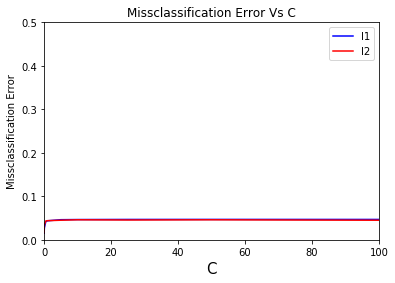

In [21]:
hyparameter_Log_gscv(X_train_st,Y_train)

In [22]:
classifier=LogisticRegression(penalty='l1',C=0.01,class_weight='balanced')
# Fitting X_train and Y_train to the claswsifier
classifier.fit(X_train_st,Y_train)
# Predict on X_test
Y_pred =classifier.predict(X_test_st)
Y_pred_proba=classifier.predict_proba(X_test_st)
evaluate(Y_test,Y_pred,Y_pred_proba)

F1 score:  0.9845463987566359
Log loss for predicted probabilities: 0.10554862863632873


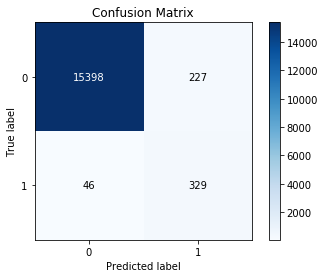

             precision    recall  f1-score   support

          0       1.00      0.99      0.99     15625
          1       0.59      0.88      0.71       375

avg / total       0.99      0.98      0.98     16000



In [23]:
import scikitplot as skplt
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=False)
plt.show()
print(classification_report(Y_test,Y_pred))

In [24]:
total_cost = 10*fp + 500*fn
print(total_cost)

25270


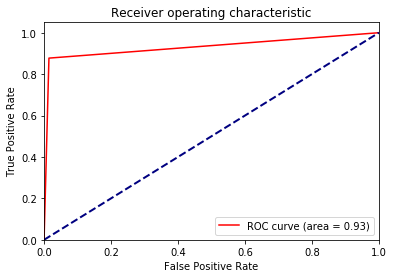

In [25]:
#display ROC curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Until now, our model has been making label predictions. The threshold used for making these predictions in 0.5 
Credits:https://www.analyticsvidhya.com/blog/2016/09/this-machine-learning-project-on-imbalanced-data-can-add-value-to-your-resume/

Due to imbalanced nature of the data, the threshold of 0.5 will always favor the majority class since the probability of a class 1 is quite low. Now, we’ll try a new technique:

Instead of labels, we’ll predict probabilities
Plot and study the AUC curve
Adjust the threshold for better prediction

### From the ROC CURVE we can see that my TP almost remain constant with change in thrsholds beyond approximately 0.05 .Since my overall objective is to prevent FP i can adjust the thresholds

In [35]:
Y_test_predictions_prec = Y_pred_proba[:,1] > 0.28

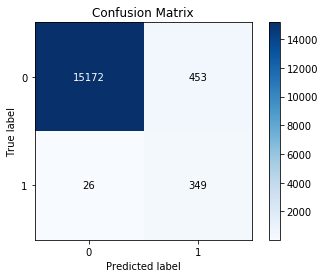

             precision    recall  f1-score   support

          0       1.00      0.97      0.98     15625
          1       0.44      0.93      0.59       375

avg / total       0.99      0.97      0.98     16000



In [36]:
import scikitplot as skplt
tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_predictions_prec).ravel()
skplt.metrics.plot_confusion_matrix(Y_test, Y_test_predictions_prec, normalize=False)
plt.show()
print(classification_report(Y_test,Y_test_predictions_prec))

In [37]:
total_cost = 10*fp + 500*fn
print(total_cost)

17530


## Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

Y_pred =classifier.predict(X_test)
Y_pred_proba=classifier.predict_proba(X_test)
evaluate(Y_test,Y_pred,Y_pred_proba)

F1 score:  0.9736555655534687
Log loss for predicted probabilities: 1.0495551640880207


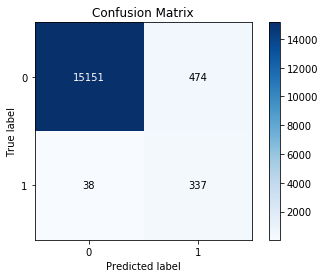

             precision    recall  f1-score   support

          0       1.00      0.97      0.98     15625
          1       0.42      0.90      0.57       375

avg / total       0.98      0.97      0.97     16000



In [47]:
import scikitplot as skplt
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=False)
plt.show()
print(classification_report(Y_test,Y_pred))

In [48]:
total_cost = 10*fp + 500*fn
print(total_cost)

23740


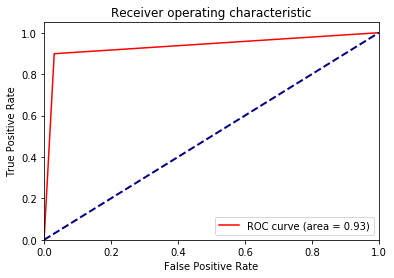

In [49]:
#display ROC curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [53]:
Y_test_predictions_prec = Y_pred_proba[:,1] > 0.28

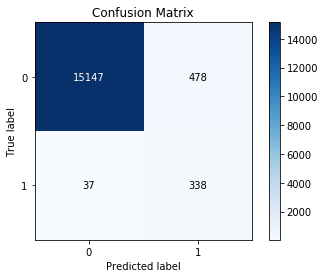

             precision    recall  f1-score   support

          0       1.00      0.97      0.98     15625
          1       0.41      0.90      0.57       375

avg / total       0.98      0.97      0.97     16000



In [54]:
import scikitplot as skplt
tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_predictions_prec).ravel()
skplt.metrics.plot_confusion_matrix(Y_test, Y_test_predictions_prec, normalize=False)
plt.show()
print(classification_report(Y_test,Y_test_predictions_prec))

In [55]:
total_cost = 10*fp + 500*fn
print(total_cost)

23280


## 9.3) Random Forest 

In [97]:
## Classifier: Random Forest Classifier
## Defining function to find optimal value of hyperparameter with Grid Search CV

def hyperparameter_RF_gscv(X_train,Y_train):
        
        classifier=RandomForestClassifier(class_weight='balanced')
        param_grid = {'n_estimators':[x for x in range(1,500,50)]} #params we need to try on classifier
        gsv = GridSearchCV(classifier,param_grid,cv=3,verbose=1,scoring='roc_auc')
        gsv.fit(X_train,Y_train)
        X_gsv=[]
        Y_gsv=[]
        for item in gsv.grid_scores_:
            X_gsv.append(item[0]['n_estimators'])
            Y_gsv.append(item[1])
        optimal_n_estimators=gsv.best_params_.get('n_estimators')
        return optimal_n_estimators

In [98]:
hyperparameter_RF_gscv(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 12.2min finished
C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


301

In [56]:
forest_clf = RandomForestClassifier(n_estimators=301)
forest_clf.fit(X_train,Y_train)
Y_pred = forest_clf.predict(X_test)
Y_pred_proba = forest_clf.predict_proba(X_test)
evaluate(Y_test,Y_pred,Y_pred_proba)

F1 score:  0.9918789082692384
Log loss for predicted probabilities: 0.02499569534829517


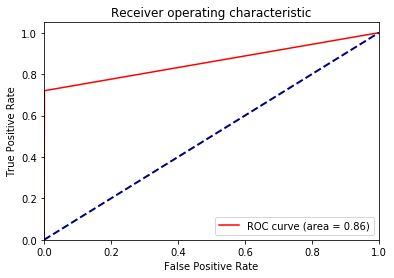

In [57]:
#display ROC curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### WE can see that in this case the ROC curve is increasing linearly. So in this case if i try to adjust thrsholds my TP will be effected 

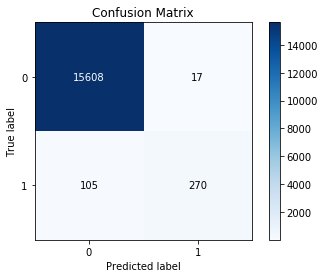

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     15625
          1       0.94      0.72      0.82       375

avg / total       0.99      0.99      0.99     16000



In [58]:
import scikitplot as skplt
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=False)
plt.show()
print(classification_report(Y_test,Y_pred))

In [59]:
total_cost = 10*fp + 500*fn
print(total_cost)

52670


In [76]:
y_test_predictions_prec = Y_pred_proba[:,1] > 0.03

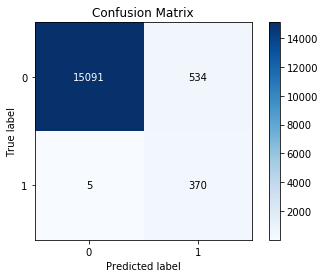

             precision    recall  f1-score   support

          0       1.00      0.97      0.98     15625
          1       0.41      0.99      0.58       375

avg / total       0.99      0.97      0.97     16000



In [77]:
skplt.metrics.plot_confusion_matrix(Y_test, y_test_predictions_prec, normalize=False)
plt.show()
print(classification_report(Y_test, y_test_predictions_prec))

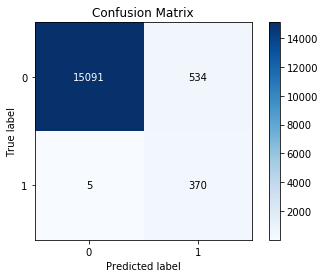

             precision    recall  f1-score   support

          0       1.00      0.97      0.98     15625
          1       0.41      0.99      0.58       375

avg / total       0.99      0.97      0.97     16000



In [78]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_test_predictions_prec).ravel()
skplt.metrics.plot_confusion_matrix(Y_test,y_test_predictions_prec, normalize=False)
plt.show()
print(classification_report(Y_test,y_test_predictions_prec))

In [79]:
total_cost = 10*fp + 500*fn
print(total_cost)

7840


## We adjusting threshold based on the ROC and got the score of 7840

## 9.4 GBDT

In [68]:
## Classifier: GBDT(XGBOOST)
## Defining function to find optimal value of hyperparameter with Grid Search CV
from xgboost import XGBClassifier

def hyperparameter_GBDT_gscv(X_train,Y_train):
        
        classifier1=XGBClassifier(class_weight='balanced')
        param_grid = {'n_estimators':[x for x in range(1,300,50)],'max_depth':[x for x in range (1,20,2)],'learning_rate':[0.1,0.2,0.4,1.0]} 
        gsv = GridSearchCV(classifier1,param_grid,cv=3,verbose=1,scoring='roc_auc')
        gsv.fit(X_train,Y_train)
        X_gsv=[]
        Y_gsv=[]
        optimal_depth=gsv.best_params_.get('max_depth')
        optimal_n_estimators=gsv.best_params_.get('n_estimators')
        optimal_learning_rate=gsv.best_params_.get('learning_rate')
        print("Best HyperParameter: ",gsv.best_params_)
        print("Best f1-score: %.2f%%"%(gsv.best_score_*100))
        return optimal_depth,optimal_n_estimators,optimal_learning_rate
        

In [156]:
hyperparameter_GBDT_gscv(X_train,Y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 696.4min finished


Best HyperParameter:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 101}
Best f1-score: 98.93%


(5, 101, 0.2)

In [81]:
from xgboost import XGBClassifier
clf =XGBClassifier(class_weight='balanced',n_estimators=101,max_depth=5,learning_rate=0.2)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
Y_pred_proba = clf.predict_proba(X_test)
evaluate(Y_test,Y_pred,Y_pred_proba)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


F1 score:  0.9932637522711882
Log loss for predicted probabilities: 0.019988834661036278


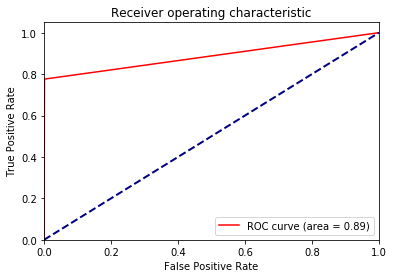

In [82]:
#display ROC curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

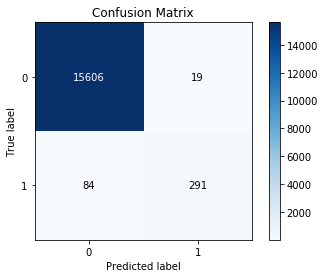

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     15625
          1       0.94      0.78      0.85       375

avg / total       0.99      0.99      0.99     16000



In [83]:
import scikitplot as skplt
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=False)
plt.show()
print(classification_report(Y_test,Y_pred))

In [73]:
total_cost = 10*fp + 500*fn
print(total_cost)

42190


In [88]:
Y_test_predictions = Y_pred_proba[:,1] > 0.1
Y_test_predictions_prec = Y_pred_proba[:,1] > 0.03

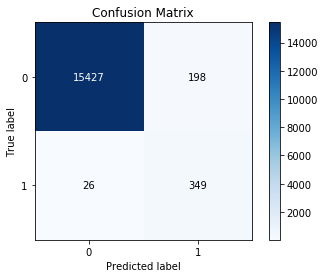

             precision    recall  f1-score   support

          0       1.00      0.99      0.99     15625
          1       0.64      0.93      0.76       375

avg / total       0.99      0.99      0.99     16000



In [89]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_test_predictions_prec ).ravel()
skplt.metrics.plot_confusion_matrix(Y_test,Y_test_predictions_prec, normalize=False)
plt.show()
print(classification_report(Y_test,Y_test_predictions_prec))

In [90]:
total_cost = 10*fp + 500*fn
print(total_cost)

14980


## 9.4 Catboost

In [91]:
from catboost import Pool, CatBoostClassifier, cv, CatBoostRegressor


In [92]:
categorical_features_indices=np.where(X_train.dtypes != np.float)[0]


In [93]:
model = CatBoostClassifier(
    iterations=1000,
    random_seed=38,
    learning_rate=0.2,
    loss_function= 'Logloss',
    eval_metric="AUC",
    use_best_model=True
    
)

model.fit(
    X_train, Y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_test, Y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [94]:
Y_pred = model.predict(X_test)
Y_pred_proba = model.predict_proba(X_test)
evaluate(Y_test,Y_pred,Y_pred_proba)

F1 score:  0.9927296483951877
Log loss for predicted probabilities: 0.02044596288818147


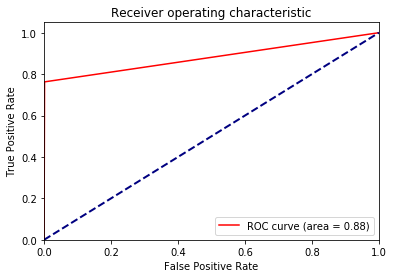

In [95]:
#display ROC curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

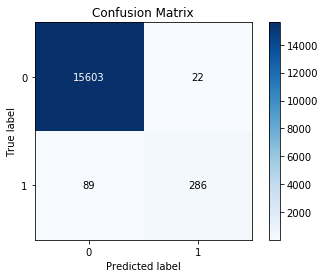

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     15625
          1       0.93      0.76      0.84       375

avg / total       0.99      0.99      0.99     16000



In [96]:
import scikitplot as skplt
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=False)
plt.show()
print(classification_report(Y_test,Y_pred))

In [97]:
total_cost = 10*fp + 500*fn
print(total_cost)

44720


In [98]:
Y_test_predictions_prec = Y_pred_proba[:,1] > 0.03

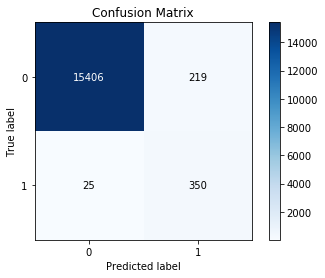

             precision    recall  f1-score   support

          0       1.00      0.99      0.99     15625
          1       0.62      0.93      0.74       375

avg / total       0.99      0.98      0.99     16000



In [99]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_test_predictions_prec ).ravel()
skplt.metrics.plot_confusion_matrix(Y_test,Y_test_predictions_prec, normalize=False)
plt.show()
print(classification_report(Y_test,Y_test_predictions_prec))

In [100]:
total_cost = 10*fp + 500*fn
print(total_cost)

14690


## Summary 

In [101]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Classifier","Threshold" ,"Score"]

x.add_row(["LogisticRegression",0.5,25250])
x.add_row(["LogisticRegression",0.28,17530])
x.add_row(["Naive Bayes",0.5,23740])
x.add_row(["Naive Bayes",0.28,23280])
x.add_row(["Random Forest",0.5,52670])
x.add_row(["Random Forest",0.03,7840])
x.add_row(["GBDT",0.5,42190])
x.add_row(["GBDT",0.03,14980])
x.add_row(["Catboost",0.5,44720])
x.add_row(["Catboost",0.03,14690])



print(x)

+--------------------+-----------+-------+
|     Classifier     | Threshold | Score |
+--------------------+-----------+-------+
| LogisticRegression |    0.5    | 25250 |
| LogisticRegression |    0.28   | 17530 |
|    Naive Bayes     |    0.5    | 23740 |
|    Naive Bayes     |    0.28   | 23280 |
|   Random Forest    |    0.5    | 52670 |
|   Random Forest    |    0.03   |  7840 |
|        GBDT        |    0.5    | 42190 |
|        GBDT        |    0.03   | 14980 |
|      Catboost      |    0.5    | 44720 |
|      Catboost      |    0.03   | 14690 |
+--------------------+-----------+-------+


## The best score obtained is 7840 with Random Forest Classifier.